# 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pokemon = pd.read_csv('/Users/kimdaehyeon/dacon/캐글 /일반 포켓몬, 전설 포켓몬 분석/Pokemon.csv')

In [139]:
original_data = pd.read_csv('/Users/kimdaehyeon/dacon/캐글 /일반 포켓몬, 전설 포켓몬 분석/Pokemon.csv')

# 데이터 확인

In [3]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
pokemon.shape

(800, 13)

In [5]:
legendary = pokemon[pokemon['Legendary'] == True].reset_index(drop = True) # 기존 인덱스 버리고 새로운 행 인덱스
normal = pokemon[pokemon['Legendary'] == False].reset_index(drop = True)

In [6]:
legendary.shape, normal.shape

# 전설 포켓몬 : 65마리, 일반 포켓몬 : 735마리

((65, 13), (735, 13))

## 결측치 확인

In [8]:
pokemon.isnull().sum()

# type2에 386개 결측치 확인

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

## 전체 컬럼 이해

In [9]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


# : 각 포켓몬의 아이디(번호)
###### 각 설명은 캐글 사이트에서 확인
- Name : 각 포켓몬의 이름
- Type 1 : 첫 번째 속성
- Type 2 : 두 번째 속성, 위에서 확인했듯이 속성이 하나면 Type 2는 결측치가 된다
- Total : 아래의 6개의 스텟의 합계
- HP : 체력
- Attack : 공격력
- Defense : 방어력
- SP Atk : 특수 공격 skill
- SP Def : 특수 공격에 대한 방어력
- Speed : 공격 속도 높은 포켓몬이 먼저 공격한다
- Generation : 포켓몬 세대, 1세대, 2세대로 구분. 총 6세대까지
- Legendary : 전설의 포켓몬 여부


## 하나씩 살펴보자.
## 1. 중복 확인
### set을 사용해 중복이 없는 데이터를 만들고 길이 확인

In [11]:
# '#'
print(len(set(pokemon['#'])))

# 전체 데이터는 800개인데 79개가 빔
# 이 말은 중복 된다는 것

721


In [12]:
# 'Name'
print(len(set(pokemon['Name'])))

800


In [14]:
# 'Type 1'
print(len(set(pokemon['Type 1'])))

18


In [16]:
# 'Type 2'
print(len(set(pokemon['Type 2'])))

# Type 1보다 한 개 더 많음

19


In [18]:
# 각각 무슨 속성이 있는지 살펴보기
print(pokemon['Type 1'].unique())

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [19]:
print(pokemon['Type 2'].unique())

# 각각 속성이 같다는 걸 알 수 있음.

['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']


In [17]:
# 나머지 한 개는 무엇인지 살펴보기
set(pokemon['Type 2']) - set(pokemon['Type 1'])

# nan 값

{nan}

In [21]:
# 그러면 속성이 같으니 한 개로 저장해도 상관 없다.
types = list(set(pokemon['Type 1']))
print(types)

['Bug', 'Dark', 'Fairy', 'Electric', 'Ground', 'Rock', 'Ghost', 'Dragon', 'Flying', 'Ice', 'Normal', 'Water', 'Steel', 'Grass', 'Fighting', 'Psychic', 'Poison', 'Fire']


In [22]:
# 그러면 속성을 1개만 가지고 있는 포켓몬을 알면 Type 2가 Nan의 값을 가진다는 걸 알 수 있음
# Type 2가 NaN인 포켓몬을 찾자
print(pokemon['Type 2'].isna().sum())

# 386마리가 속성이 1개

386


### Type 1의 데이터 분포

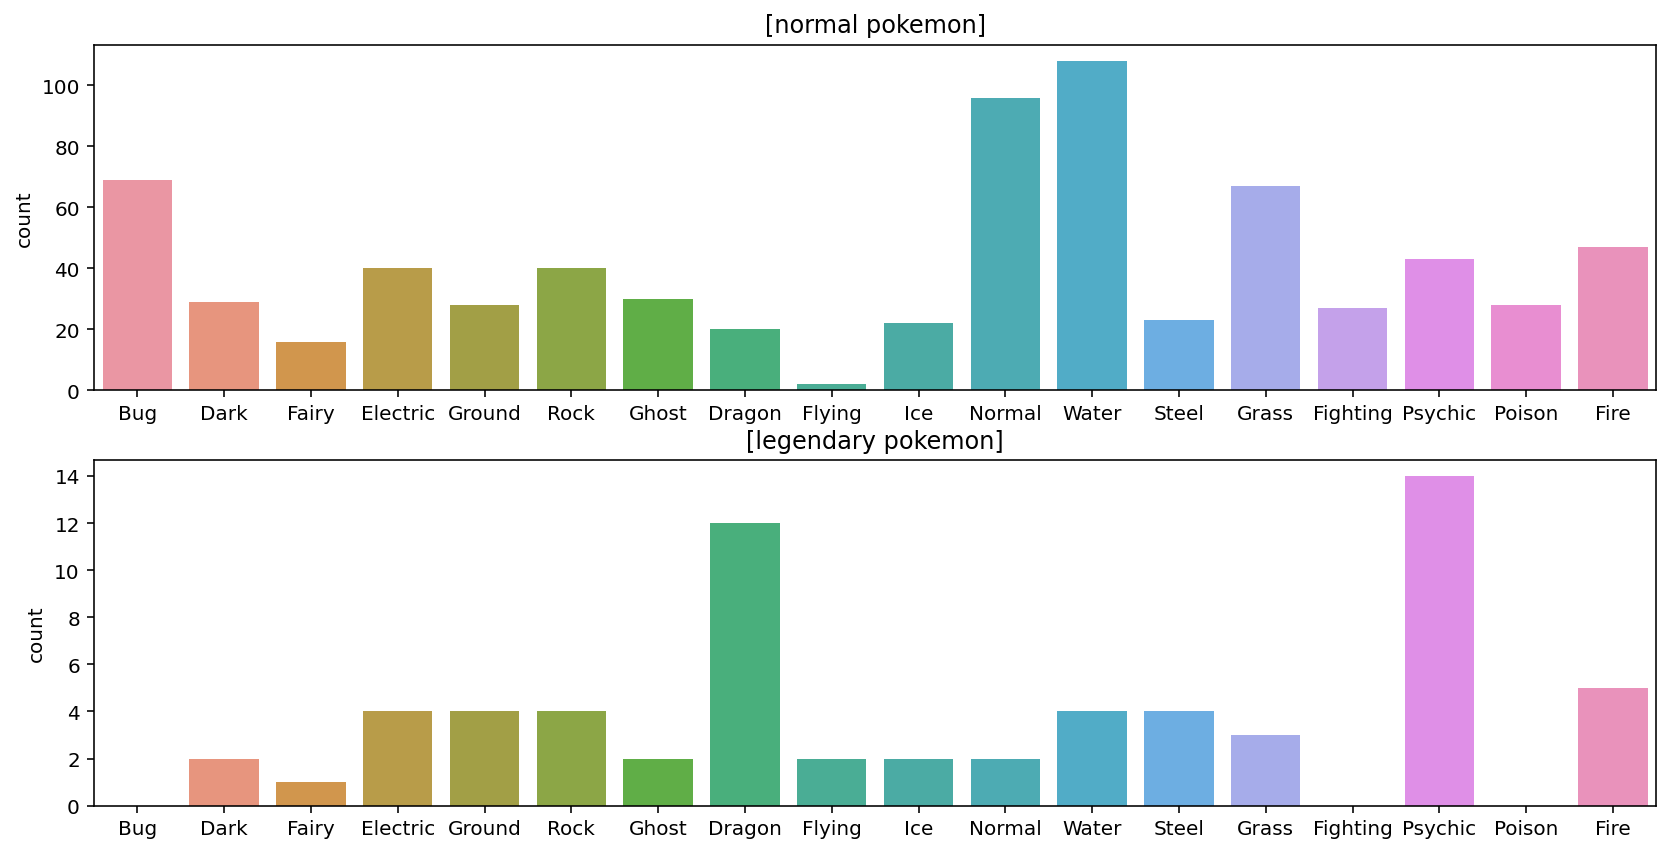

In [24]:
# 일반 포켓몬과 전설 포켓몬의 각 속성 분포도를 살펴보자
plt.figure(figsize = (14, 7))

plt.subplot(2,1,1)
sns.countplot(data = normal, x = 'Type 1', order = types).set_xlabel('')
plt.title('[normal pokemon]')

plt.subplot(2,1,2)
sns.countplot(data = legendary, x = 'Type 1', order = types).set_xlabel('')
plt.title('[legendary pokemon]')

plt.show()

#### 일반 포켓몬은 normal, water, bug 속성에 제일 많이 분포
#### 전설 포켓몬은 psychic, dragon 속성에 제일 많이 분포

In [28]:
### pivot table로 각 속성에 전설 포켓몬이 몇 퍼센트를 차지하는지 확인해보자
pd.pivot_table(pokemon, index = 'Type 1', values = 'Legendary').sort_values(by = ['Legendary'], ascending = False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


### Type 2의 데이터 분포

Text(0.5, 1.0, '[legendary pokemon]')

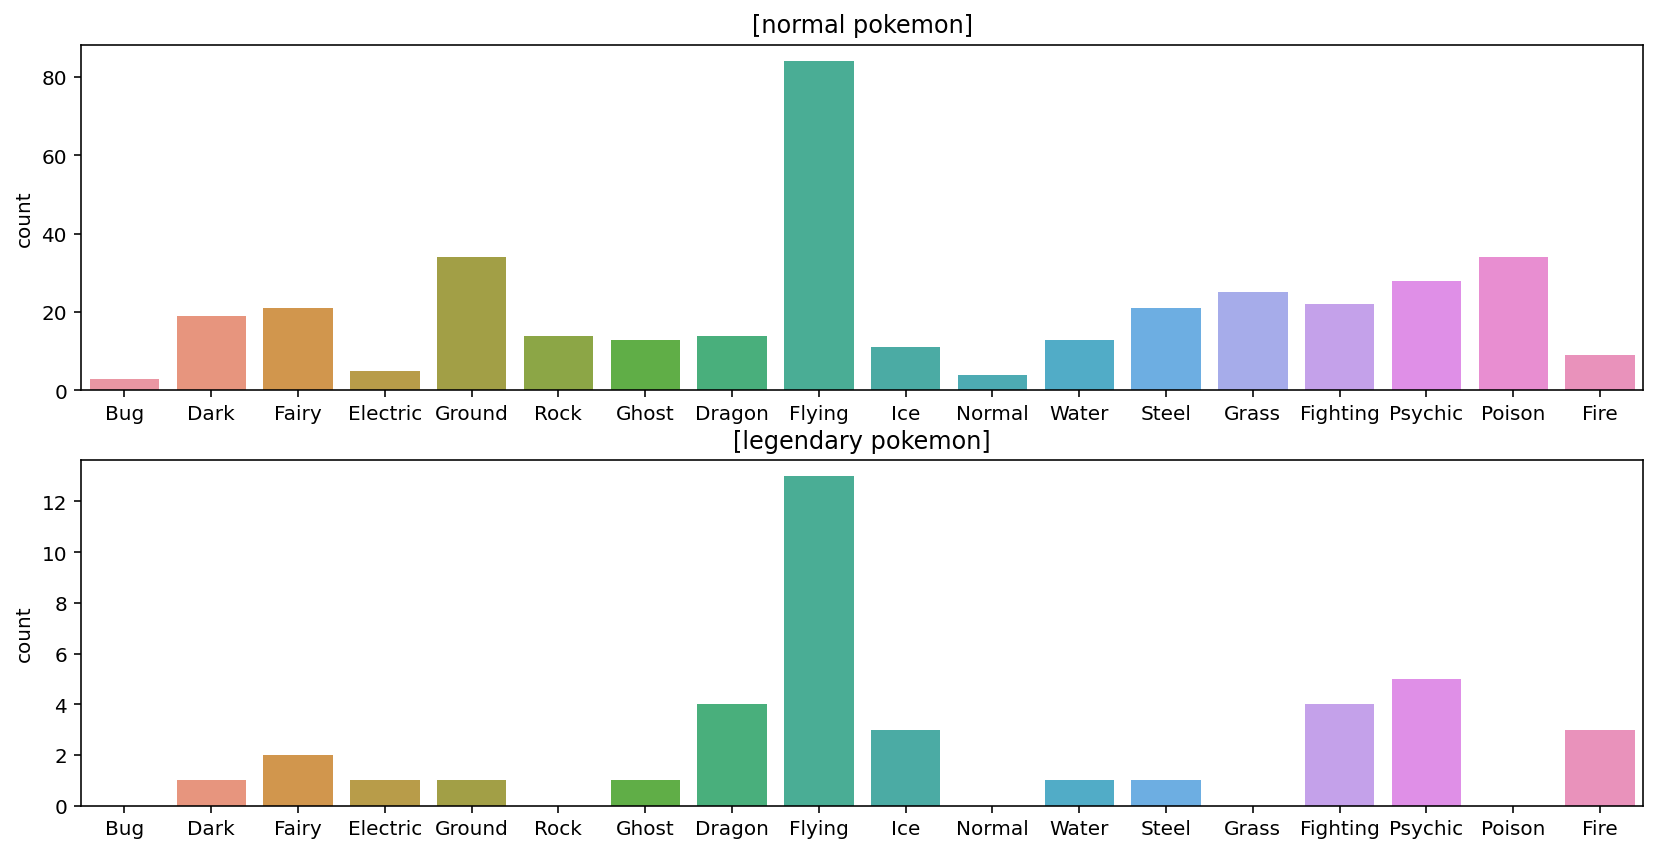

In [33]:
plt.figure(figsize = (14, 7))

plt.subplot(2,1,1)
sns.countplot(data = normal, x = 'Type 2', order = types).set_xlabel('')
plt.title('[normal pokemon]')

plt.subplot(2,1,2)
sns.countplot(data = legendary, x = 'Type 2', order = types).set_xlabel('')
plt.title('[legendary pokemon]')

#### normal, legendary 모두 flying 속성이 제일 많음

In [35]:
### pivot table로 각 속성에 전설 포켓몬이 몇 퍼센트를 차지하는지 확인해보자
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


In [43]:
# 'Total'
# stats들의 합계
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [44]:
# 각 스텟과 total 데이터 확인
print("0번째 포켓몬 : ", pokemon.loc[0, "Name"])
print("Total : ", int(pokemon.loc[0, "Total"]))
print("stats : ", list(pokemon.loc[0, stats]))
print("stats 총 합 : ", sum(list(pokemon.loc[0, stats])))

# total과 stats의 총 합이 일치

0번째 포켓몬 :  Bulbasaur
Total :  318
stats :  [45, 49, 49, 65, 65, 45]
stats 총 합 :  318


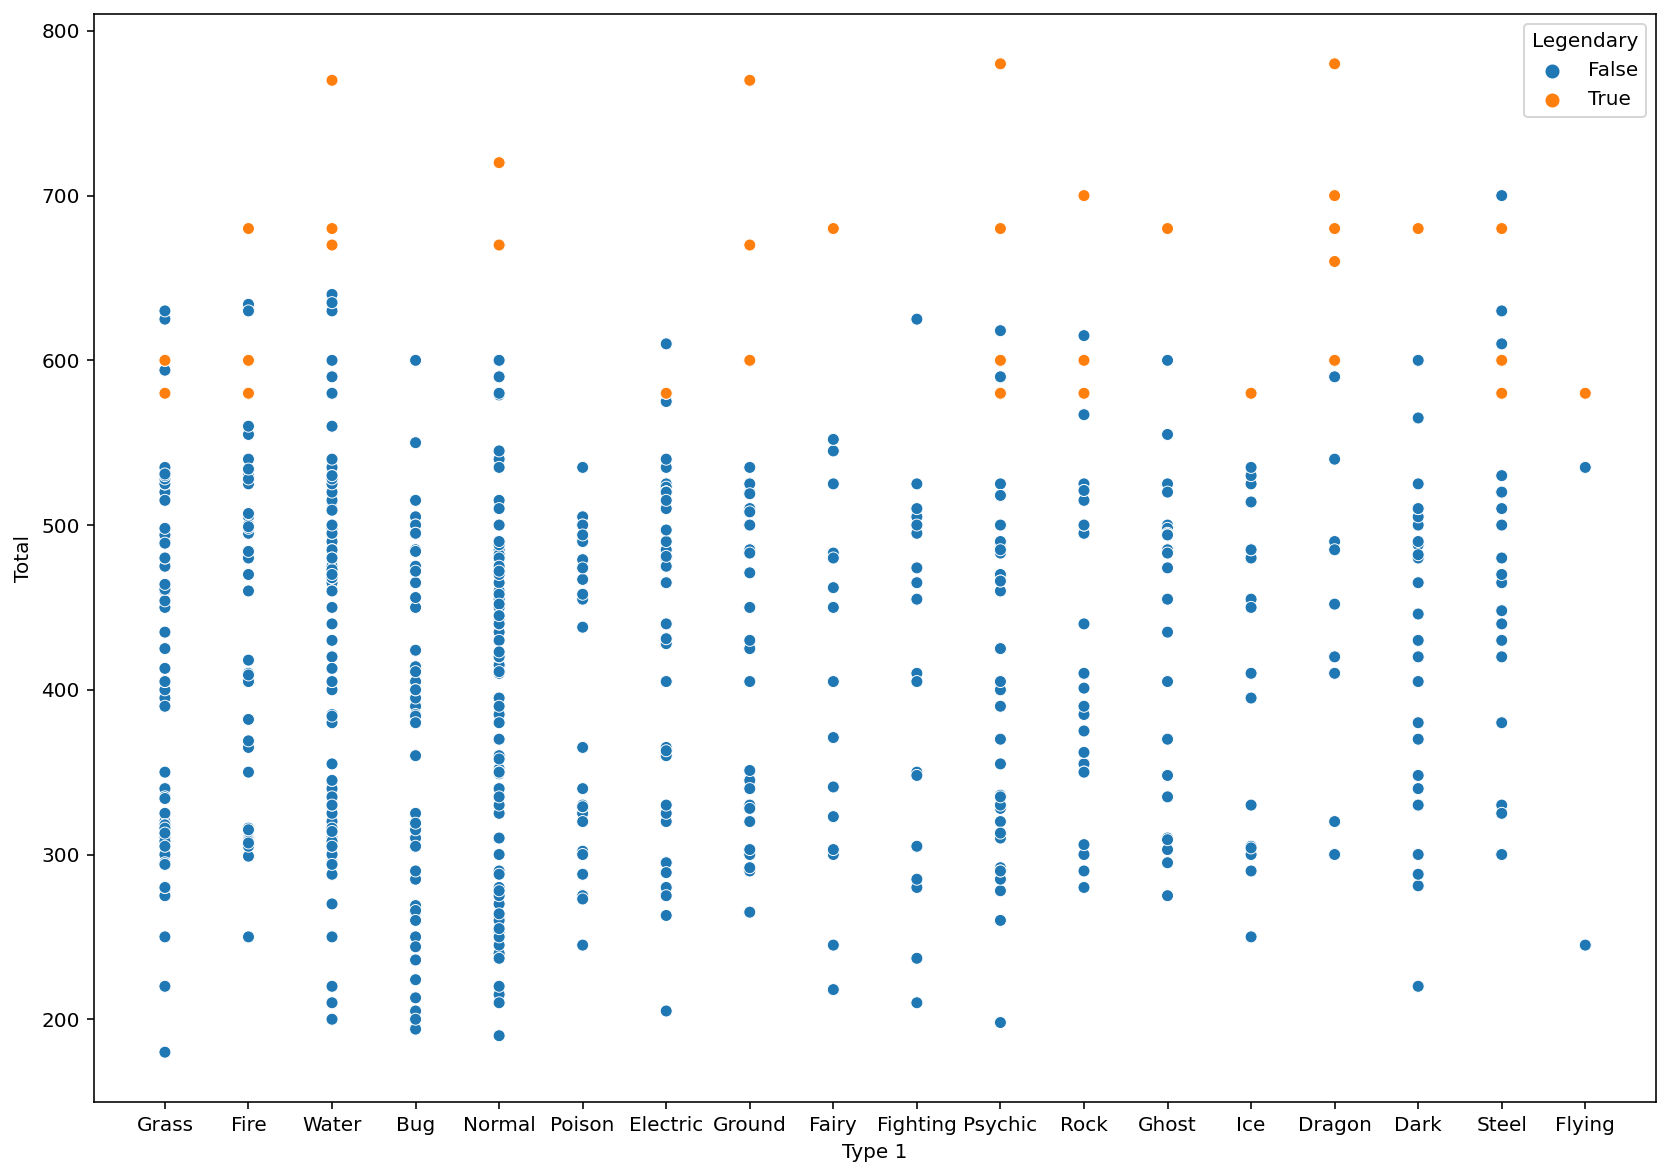

In [48]:
# Total에 대한 plot을 확인해보자
fig, ax = plt.subplots()
fig.set_size_inches(14, 10) # 이미 plot을 만든 후에 다시 조절하고 싶을 때

# hue를 통해 legendary는 따로 표시 해뒀음
sns.scatterplot(data = pokemon, x = 'Type 1', y = 'Total', hue = 'Legendary') 

plt.show()

#### 전설 포켓몬이 대체적으로 total 스텟 값이 높음

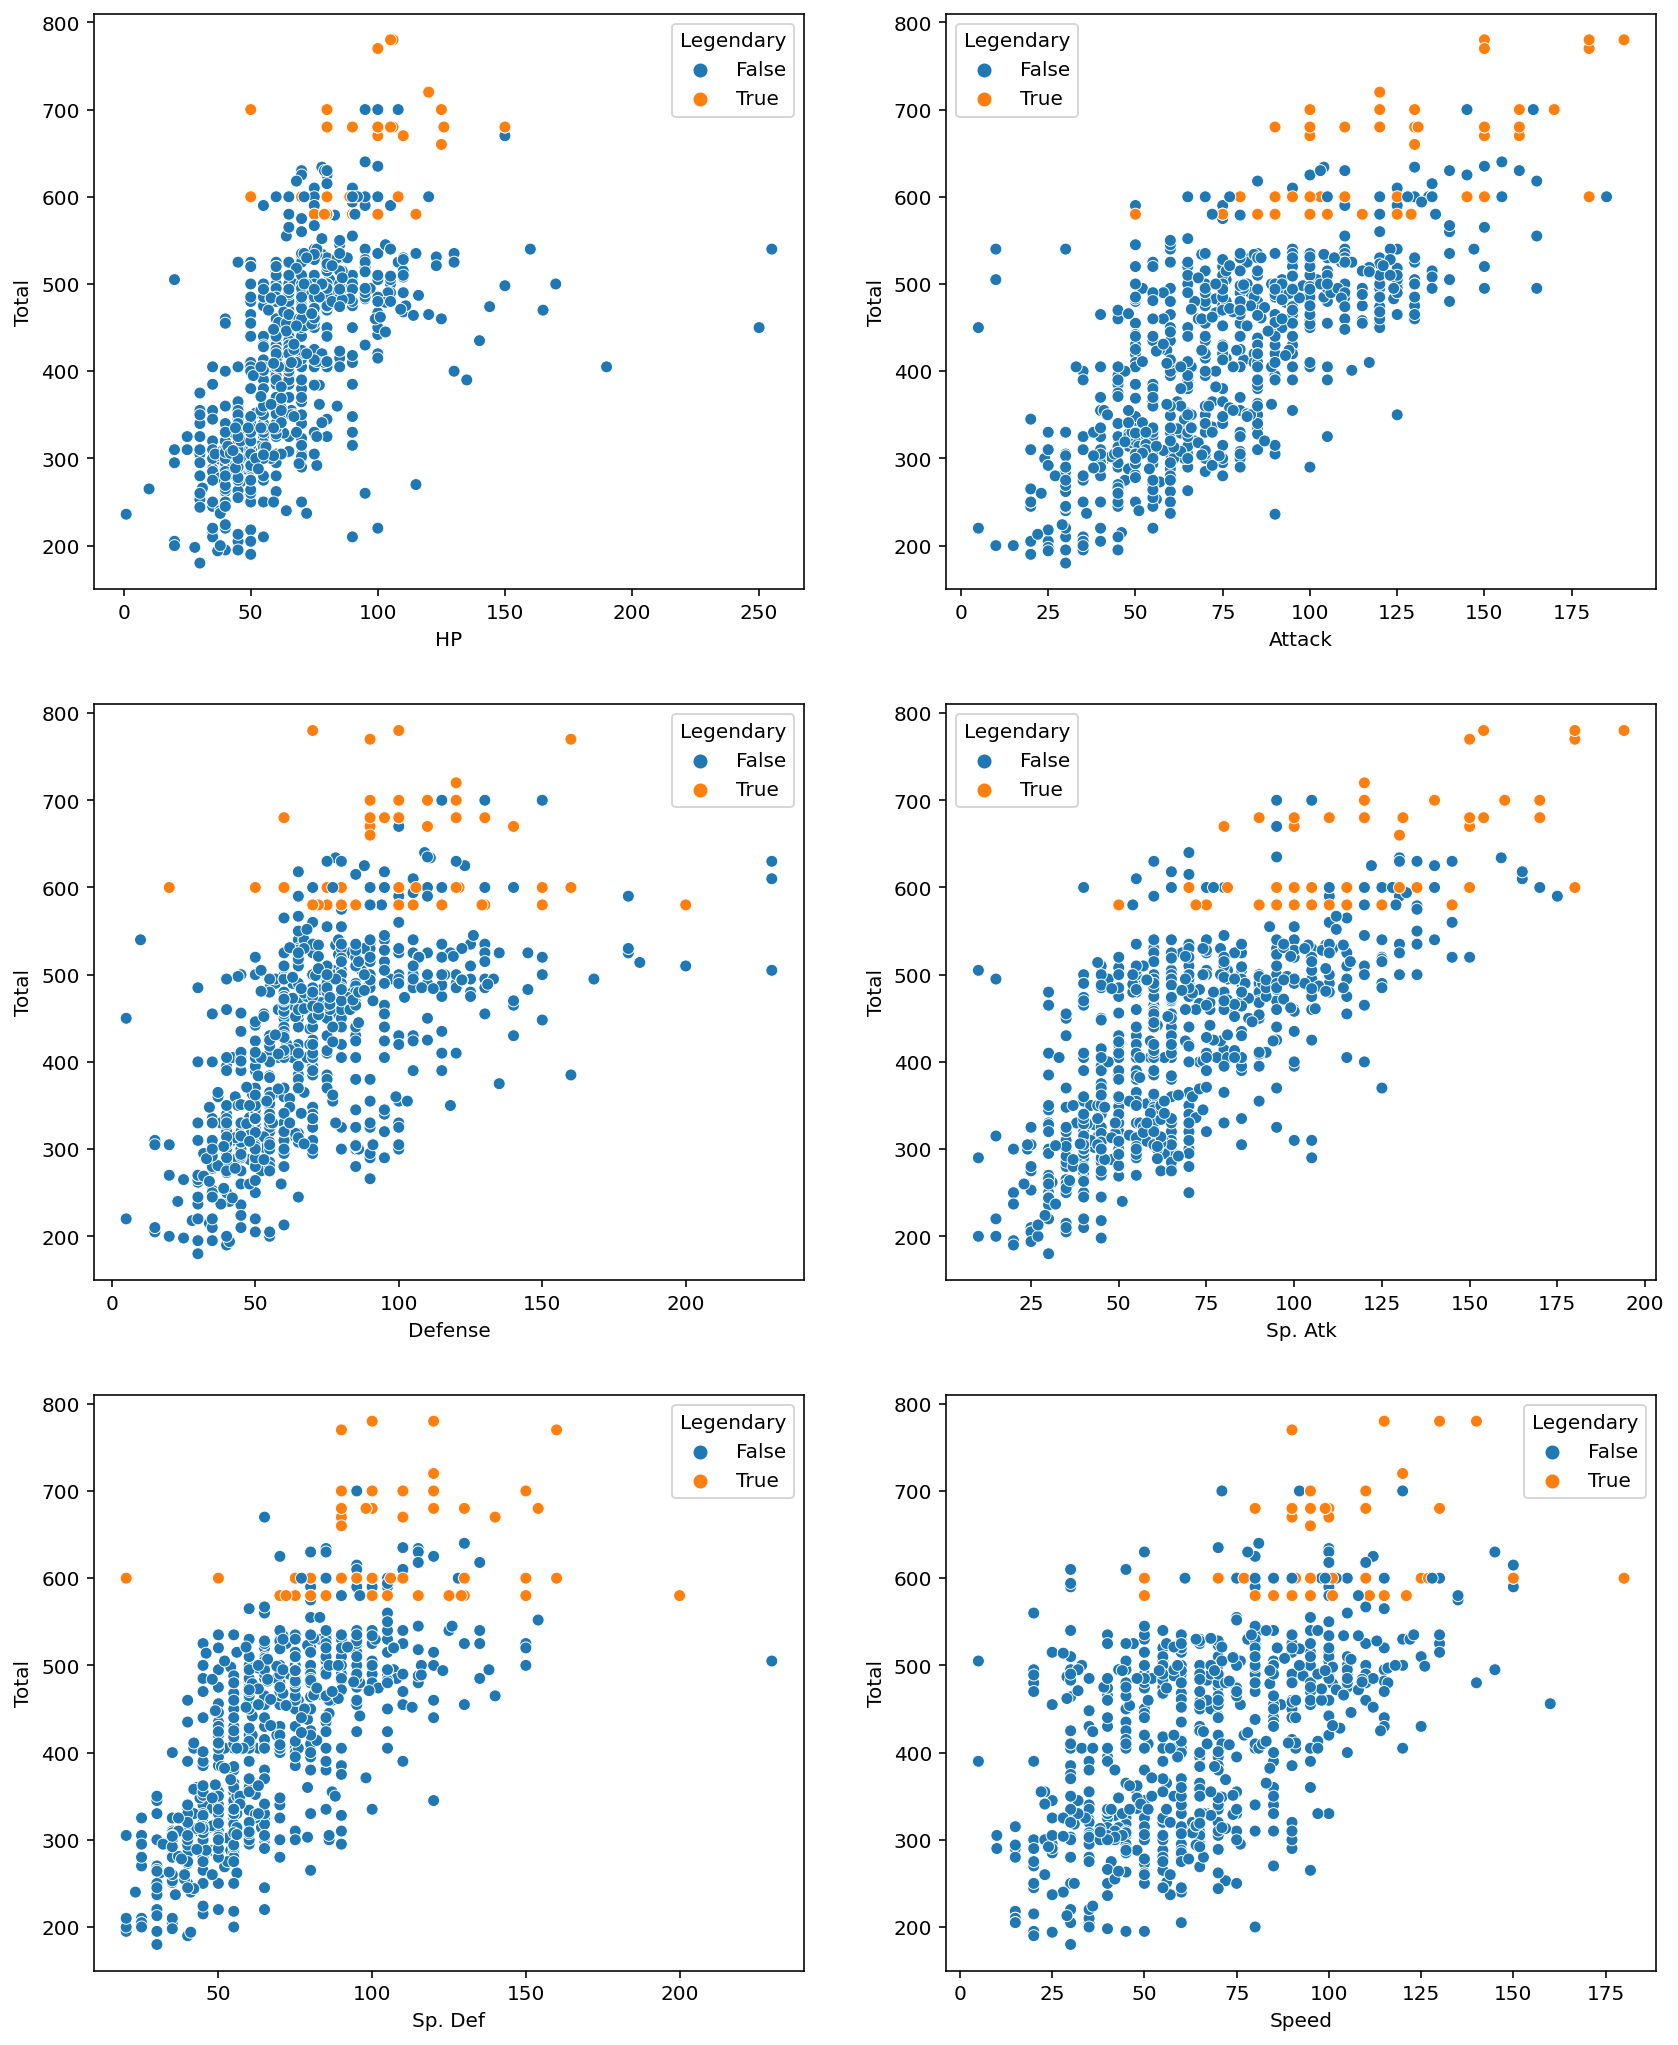

In [52]:
# 'Stats'
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2)
figure.set_size_inches(14, 18)

sns.scatterplot(data = pokemon, y = 'Total', x = 'HP', hue = 'Legendary', ax = ax1)
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax = ax2)
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax = ax3)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax = ax4)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax = ax5)
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax = ax6)

plt.show()

#### Total 값은 높지만, 전설 포켓몬보다 각 속성이 더 높은 경우도 있음

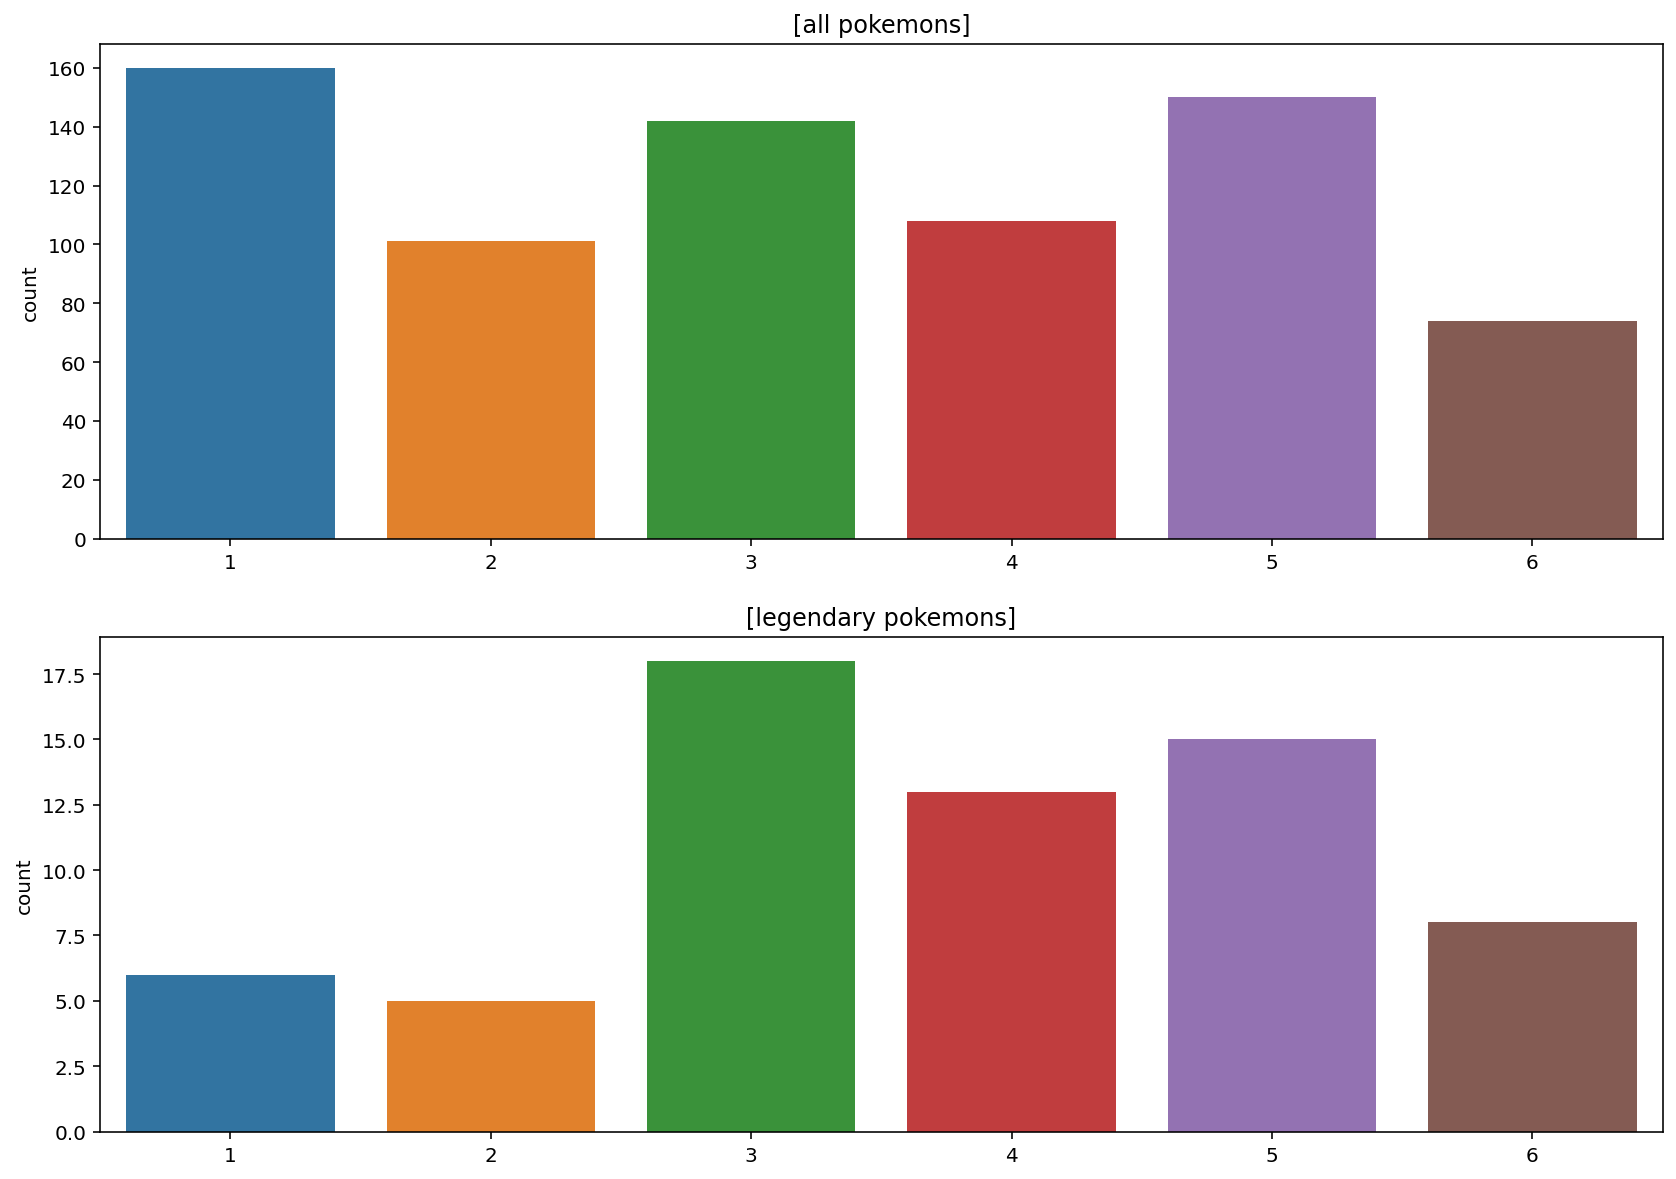

In [54]:
# 'Generation'
# 각 세대에 대한 포켓몬 수 
plt.figure(figsize = (14, 10))

plt.subplot(2,1,1)
sns.countplot(data = normal, x = 'Generation').set_xlabel('')
plt.title('[all pokemons]')

plt.subplot(2,1,2)
sns.countplot(data = legendary, x = 'Generation').set_xlabel('')
plt.title('[legendary pokemons]')

plt.show()

#### 전설이 점점 많아짐

# 분석하기
## 원래 목표 : 일반, 전설 포켓몬을 분류하는 것
### 그러기 위해서는 각각의 특징들을 세분화해서 확인하기

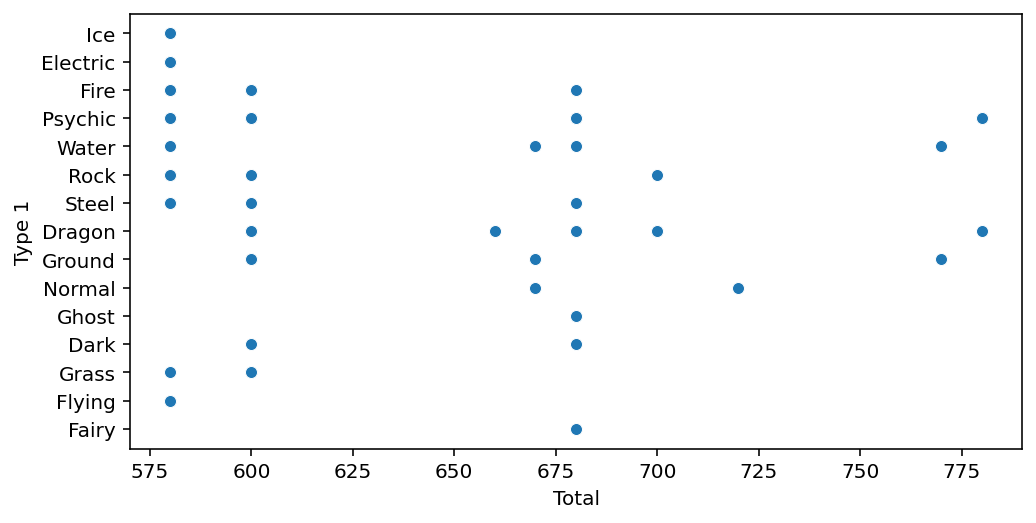

In [55]:
# 전설의 Total
# 전설 포켓몬의 속성에 대한 Total 값을 확인해보자
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data = legendary, y = 'Type 1', x = 'Total')
plt.show()

#### x축은 Total의 값들인데 같은 Total값을 가지는 전설 포켓몬들이 많다.

In [58]:
# 전설 포켓몬들의 Total 값의 집합을 확인해보자
print(sorted(list(set(legendary['Total']))))

# 9가지 밖에 안됌. 중복 되 있는 값 있음

[580, 600, 660, 670, 680, 700, 720, 770, 780]


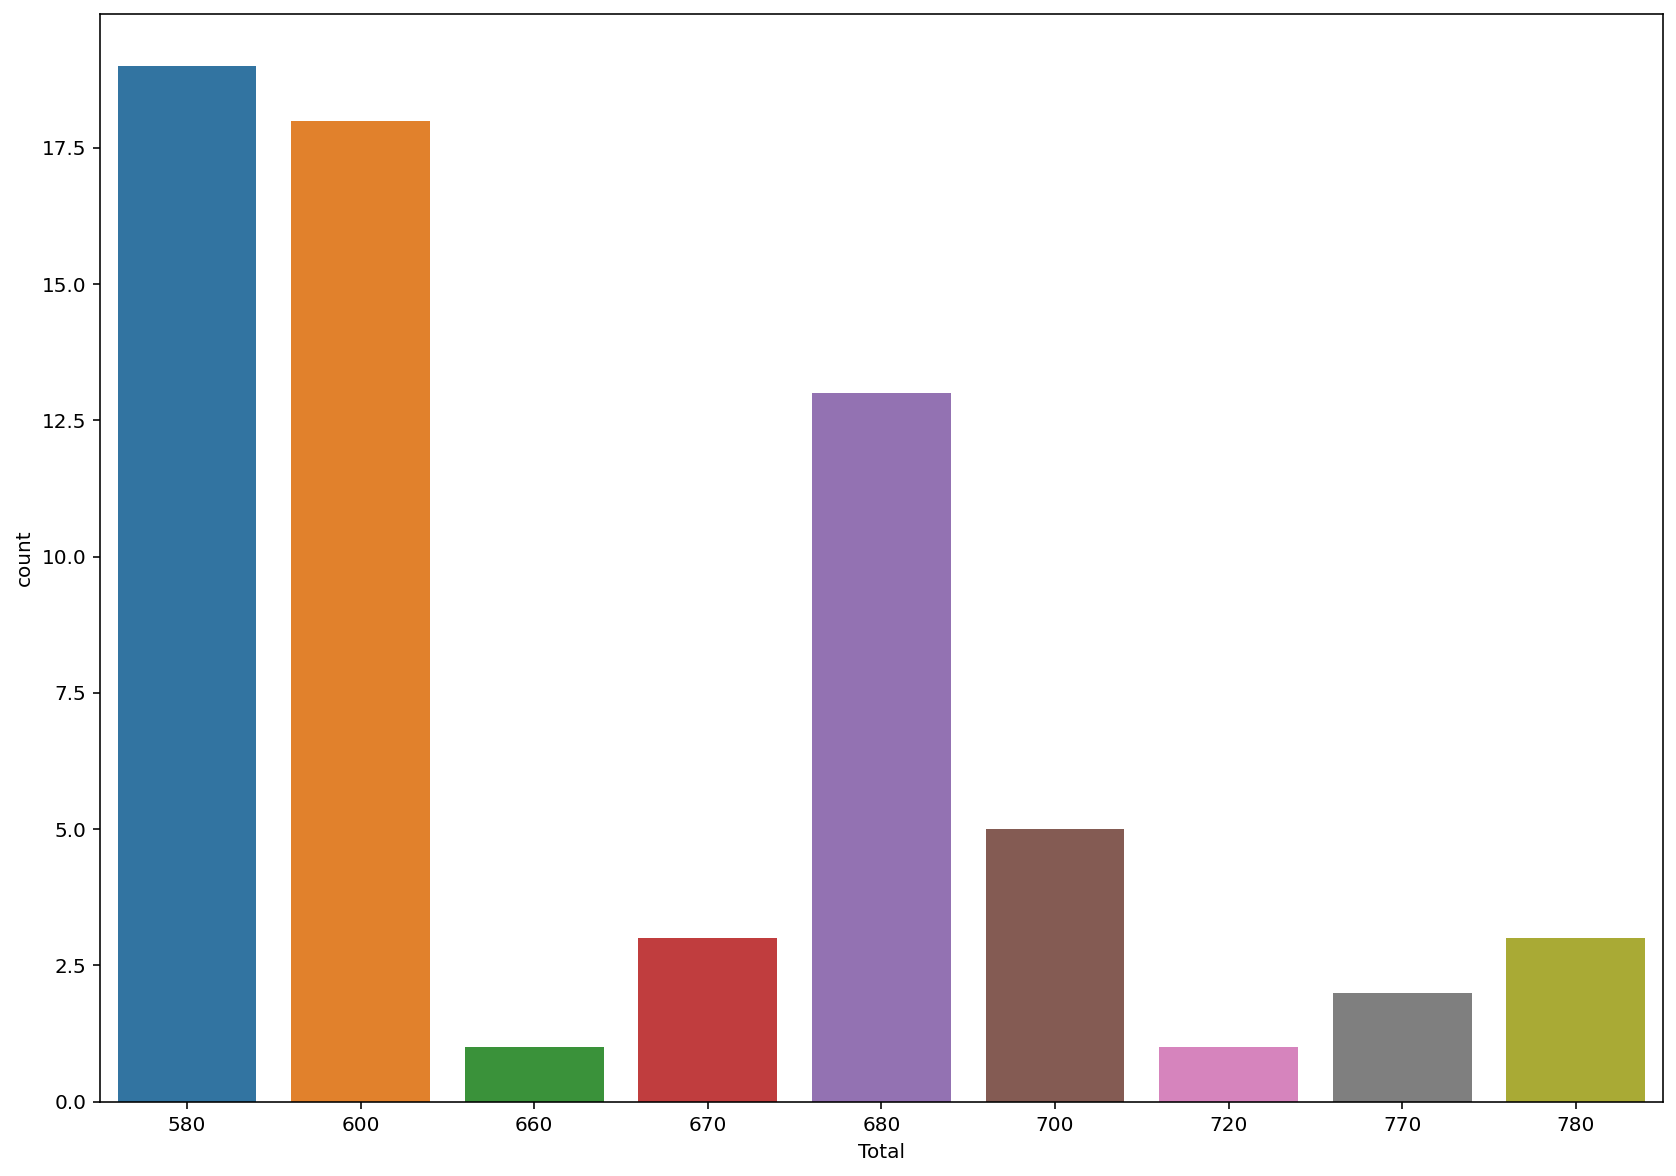

In [59]:
# 같은 total 값 가지는 전설 포켓몬의 수를 알아보자
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

sns.countplot(data = legendary, x = 'Total')
plt.show()

In [61]:
# 그럼 일반 포켓몬의 Total 값은 어떻게 분포되어 있는지 확인해보자
print(sorted(list(set(normal['Total']))))
print(len(sorted(list(set(normal['Total'])))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]
195


In [62]:
# 각각의 비율을 생각해보자
# 전설은 65 / 9 ~= 7.22 마리가 같은 Total 값을 가진다.
# 일반은 765 / 195 ~= 3.77 마리가 같은 Total 값을 가진다.

### 위 과정을 통해 알 수 있는 점
#### - 일반 포켓몬의 Total 값은 다양하고, 전설 포켓몬의 Total은 다양하지 않다.
####  => 포켓몬의 Total 값이 전설 포켓몬 Total 값의 집합에 포함되는지를 통해 전설 포켓몬을 유추할 수 있다.
#### - 전설 포켓몬의 Total 값은 일반 포켓몬은 가지지 못하는 Total 값이 존재한다.
####   =>Total 값을 통해 전설인지 아닌지를 판단하는데 영향을 줄 수 있다.
#### - 결론적으로 Total 값은 전설을 분류하는데 유의미한 칼럼이다.

## 전설의 이름

In [63]:
# 포켓몬들은 이름이 유사하거나 특정 단어가 들어가 있는 경우가 있다.

In [67]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1,n2,n3,n4,n5]).reset_index(drop=True)
names

# 보면 이름이 비슷한 포켓몬들이 많다.
# Mewtwo, Latias, Forme ..

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [68]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [69]:
# 그리고 전설 포켓몬들의 특징은 이름이 길어보인다.
# 데이터셋에 이름 길이 컬럼을 생성해서 비교해보자.
legendary['name_len'] = legendary['Name'].apply(lambda i : len(i))
normal['name_len'] = normal['Name'].apply(lambda i : len(i))

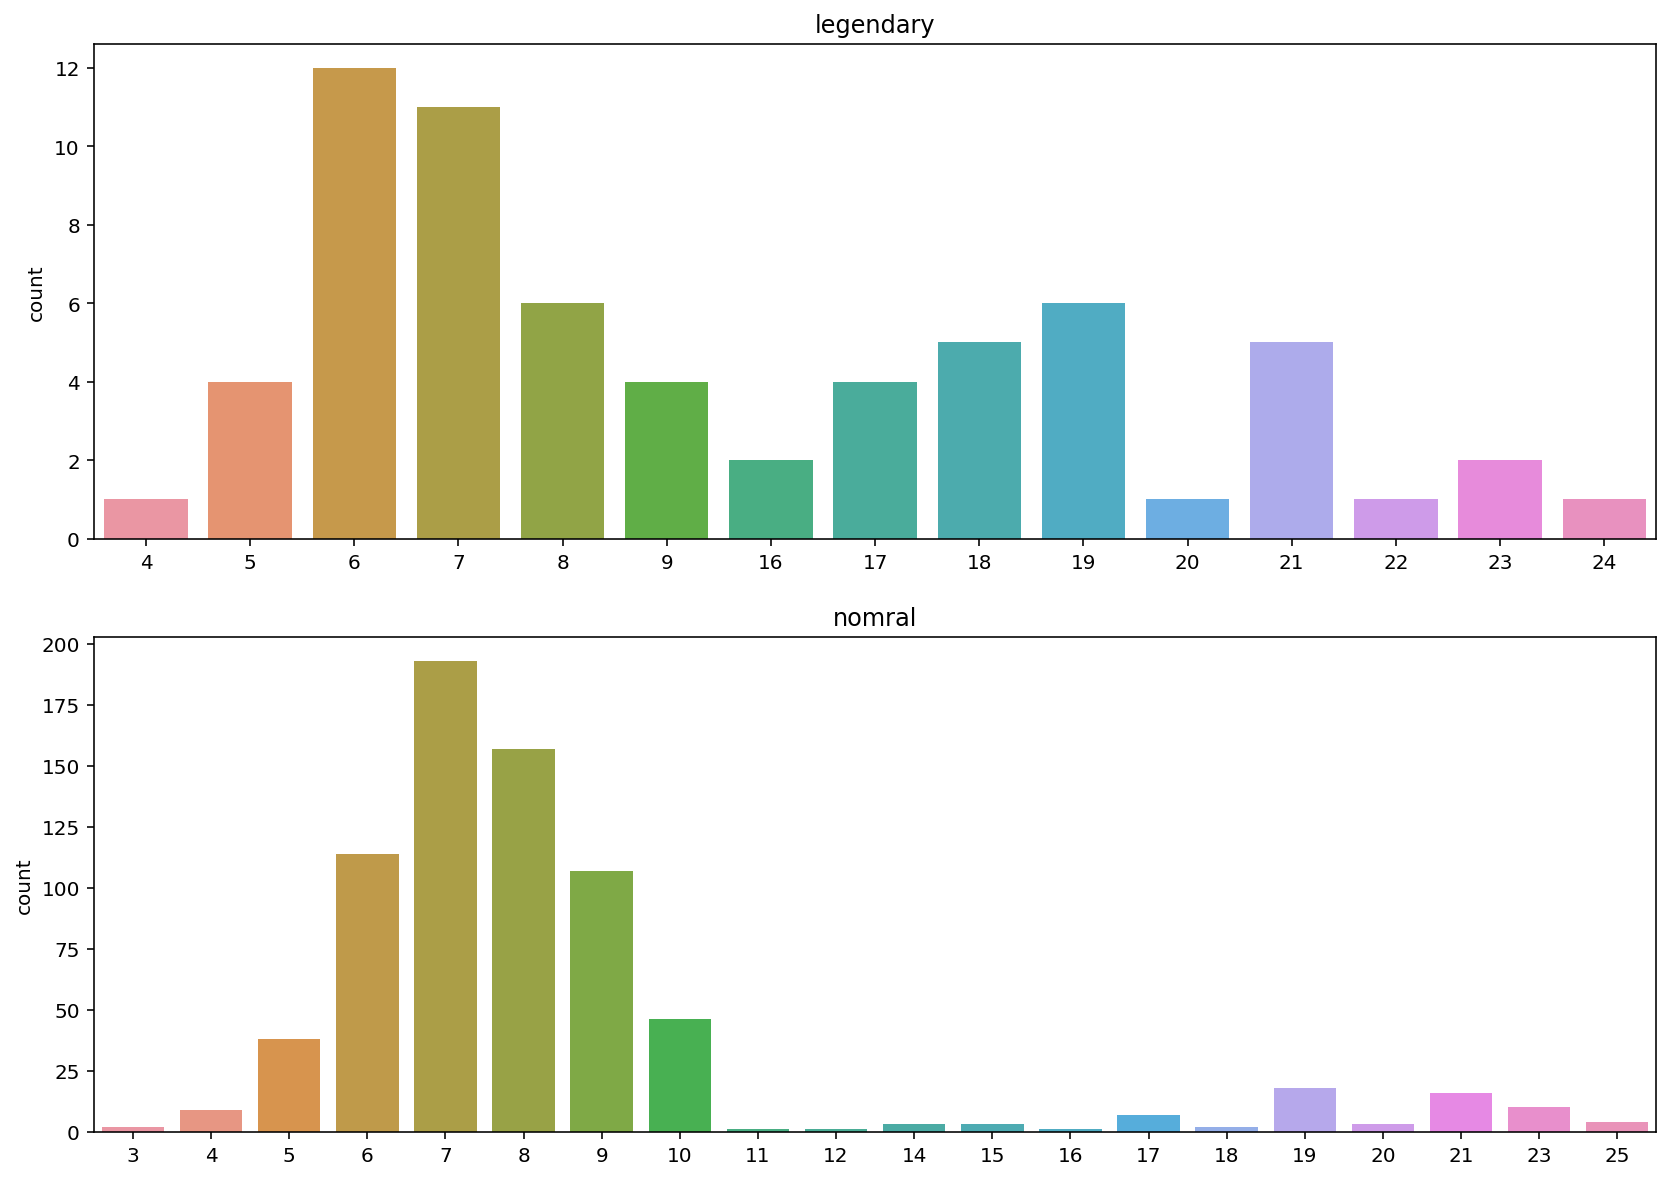

In [71]:
# name_len의 특징을 살펴보자
plt.figure(figsize = (14, 10))

plt.subplot(211)
sns.countplot(data = legendary, x = 'name_len').set_xlabel('')
plt.title('legendary')

plt.subplot(212)
sns.countplot(data = normal, x = 'name_len').set_xlabel('')
plt.title('nomral')

plt.show()

##### legendary와 normal의 name_len은 3~ 9까진 비슷하지만 그 이상부터는 전설 포켓몬들이 많다.

In [72]:
# 전설과 일반 포켓몬의 이름이 10 이상인 비율을 확인해보자
print(round(len(legendary[legendary['name_len'] > 9]) / len(legendary) * 100, 2), '%')
print(round(len(normal[normal['name_len'] > 9]) / len(normal) * 100, 2), '%')

41.54 %
15.65 %


#### 이름 분석을 통해 알 수 있는 점 
##### (1) Latios가 전설이면 ~Latios도 전설 포켓몬이다.
##### (2) 전설 포켓몬은 높은 빈도를 보이는 이름들의 모임이 존재
##### (3) 전설 포켓몬은 긴 이름을 가졌을 확률이 높다.

# 데이터 전처리

In [74]:
# 항상 데이터 분석을 할 때는 데이터를 모델에 입력할 수 있는 형태로 변환하는 것이 매우 중요
# 머신러닝 모델은 문자열 데이터를 처리할 수 없어 숫자, 부울 데이터로 전처리 해줘야 한다.
# 이름 칼럼을 모델이 연산할 수 있는 형태로 처리해보려 한다.
# (1) 이름의 길이 : name_len 칼럼이 10을 넘는지 아닌지에 대한 categorical 칼럼을 생성한다.
# (2) 토큰 추출 : 전설 포켓몬에서 가장 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩으로 처리

In [75]:
# 이름의 길이
# 전체 데이터가 있는 포켓몬 데이터 프레임에 생성
# name_len이 10 이상이면 True, name_len이 10 미만이면 False를 가지는 long_name을 생성
pokemon['name_len'] = pokemon['Name'].apply(lambda i : len(i))

pokemon['long_name'] = pokemon['name_len'] >= 10

In [77]:
pokemon.head()

# 포켓몬 분류에 있어 이름의 길이 값인 name_len과 불 값을 가진 long_name 둘 중 어떤 것이 더 좋은 결과를 보여줄지는 모른다.

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_len,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


## 이름 토큰


In [79]:
# 포켓몬 이름에는 4가지 유형이 존재
# 한 단어일 경우 : Diancie
# 두 단어일 경우 : DiancieMega Diancie (앞 단어 두 개의 대문자, 대문자를 기준으로 나뉜다)
# 두 단어에 성별 표시 : CharizardMega Charizard X(또는 Y)
# 알파벳이 아닌 문자를 포함하는 경우 : Zygarde50% Forme

In [83]:
# 알파벳이 아닌 문자
# 알파벳이 아닌 문자를 포함할 때 전처리 => pandas의 isalpha() 함수를 사용하면 됌
# isalpha() 함수는 띄어쓰기도 문자를 포함하고 있다고 처리함

# 먼저 띄어쓰기가 없는 컬럼은 따로 만들어주고 띄어쓰기를 빈칸으로 처리한다.
pokemon['Name_nospace'] = pokemon['Name'].apply(lambda i : i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_len,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [84]:
# isalpha() 함수를 사용해 이름이 알파벳으로만 이루어져 있는지 확인
pokemon['name_isalpha'] = pokemon['Name_nospace'].apply(lambda i : i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_len,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [87]:
# 알파벳이 아닌 다른 문자가 이름에 포함된 것들 확인
print(pokemon[pokemon['name_isalpha'] == False].shape)
pokemon[pokemon['name_isalpha'] == False]

# 9마리가 알파벳이 아닌 문자를 포함하고 있음
# 이 정도는 직접 이름을 바꾸자.

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_len,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [88]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

In [89]:
# 이름 토큰화하기
# 이제 이름을 세 가지 타입으로 토큰화할 수 있다.
# 문자열을 처리할 때 정규표현식(RegEx : Regular Expression)이라는 것이 사용된다.
# 정규표현식 : 특정 조건의 문자를 '검색 또는 치환'하는 과정을 매우 간편하게 처리할 수 있도록 도와줌.

# 정규표현식은 re 모듈을 import 해준다
# 예제
import re
name = "CharizardMega Charizard X"

name_split = name.split()
name_split

['CharizardMega', 'Charizard', 'X']

In [90]:
# 우선 공백을 기준으로 나눠보자
# split()은 문자열을 공백을 기준으로 나눠 리스트를 만든다.
name_split = name.split()
name_split

['CharizardMega', 'Charizard', 'X']

In [91]:
# 이 다음은 CharizardMega를 나눠 줘야한다. 대문자를 기준으로 분리를 해보자
temp = name_split[0]
temp

'CharizardMega'

In [94]:
# CharizardMega를 temp에 넣어주고 findall를 사용해 대문자로 시작해서 소문자로 끝나는 패턴을 찾아 나눠준다.
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

# 위에 [A-Z][a-z]*이 정규표현식이다.
# [A-Z] : A-Z 대문자 중 한 가지로 시작
# [a-z] : 대문자 뒤로 a-z 소문자 중 하나가 붙는다.
# * : 앞의 소문자가 반복(*는 정규표현식에서 반복을 뜻한다.)

['Charizard', 'Mega']

In [101]:
# 위 과정을 tokens 리스트에 담아보자.
# 이 코드는 한 개의 이름만 토큰화하는 코드이다.
tokens = []

for part_name in name_split :
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)

tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [104]:
# 전체 데이터셋에 적용할 수 있도록 하는 코드
def tokenize(name) :
    name_split = name.split(" ") # 공백을 각각 처리함
     
    # 대문자를 기준으로 나눔
    tokens = [] 
    for part_name in name_split :
        a = re.findall('[A-Z][a-z]*', part_name) 
        tokens.extend(a)
        
    # array형식으로 리스트를 반환
    return np.array(tokens)

# legendary['name'] 데이터들을 tokenize 함수를 돌려 값들을 리스트에 저장
all_tokens = list(legendary['Name'].apply(tokenize).values)

# 깔끔하게 다른 리스트에 저장
token_set = []
for token in all_tokens :
    token_set.extend(token)
    
print(len(set(token_set)))
print(len(token_set))
print(token_set)

# 총 120개의 token이 있고 중복을 제외한 token은 65개가 있다.

65
120
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', '

In [110]:
# 가장 많이 사용된 토큰을 추출해보자
# list, set 자료형에서 각 요소의 개수를 다룰 때는 collections 라는 패키지를 사용한다.

# collections는 데이터 전처리, 효율적 자료 구조 설정에서 많이 활용되기 때문에 잘 알아두는 것이 좋다.
# collections의 Counter를 사용할 것이다.
import collections
scores = ['A', 'B', 'B', 'C', 'C', 'D', 'A']
counter = collections.Counter(scores)
print(counter)

# 보면 딕셔너리 형태의 Counter 객체를 가진다.

Counter({'A': 2, 'B': 2, 'C': 2, 'D': 1})


collections.Counter

In [111]:
# 더 나아가 most_common을 사용하면 가장 많이 있는 요소와 개수를 보여준다.
counter = collections.Counter(scores).most_common()
print(counter)

[('A', 2), ('B', 2), ('C', 2), ('D', 1)]


In [115]:
# 이제 token_set에 사용해보자
from collections import Counter
most_common = Counter(token_set).most_common(10)
print(most_common)

[('Forme', 15), ('Mega', 6), ('Mewtwo', 5), ('Kyurem', 5), ('Deoxys', 4), ('Hoopa', 4), ('Latias', 3), ('Latios', 3), ('Kyogre', 3), ('Groudon', 3)]


In [116]:
# 마지막으로 전설의 포켓몬 이름에 해당하는 토큰이 포켓몬의 이름에 있는지 확인하는 칼럼을 만든다.
# 특정 구문이 포함되어 있는지 확인할 때는 pandas의 str.contains함수를 사용한다.
for token, _ in most_common :
    pokemon[f'{token}'] = pokemon['Name'].str.contains(token)
    
pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


#### 지금까지 문자열들을 전처리를 통해 부울 데이터로 변환시킴

## 범주형 데이터 전처리

In [118]:
# 이제 범주형 데이터인 Type 컬럼을 처리하려고 한다.
# 두 가지 규칙으로 범주형 데이터를 전처리한다.
# (1) 18가지 모든 Type을 원 핫 인코딩한다.
# (2) 두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1의 값을 가지게 한다.

In [121]:
# 앞에서 만든 Type의 리스트인 Types를 확인해보자
print(types)

['Bug', 'Dark', 'Fairy', 'Electric', 'Ground', 'Rock', 'Ghost', 'Dragon', 'Flying', 'Ice', 'Normal', 'Water', 'Steel', 'Grass', 'Fighting', 'Psychic', 'Poison', 'Fire']


In [137]:
# 원 핫 인코딩
for t in types :
    pokemon[t] = (pokemon['Type 1'] == t) | (pokemon['Type 2'] == t)
    
pokemon[['Type 1', 'Type 2'] + types].head()

,Type 1,Type 2,Bug,Dark,Fairy,Electric,Ground,Rock,Ghost,Dragon,Flying,Ice,Normal,Water,Steel,Grass,Fighting,Psychic,Poison,Fire
0,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
1,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
3,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


# 모델 만들기

## 베이스라인
### 베이스라인 : 가장 기초적인 방법, 지금까지 생성했던 칼럼들이 아닌 처음 데이터를 불러 왔을 때 있던 칼럼들만 사용해서 만드는 모델
### 만드는 이유 : 성능 하한선을 통해 새롭게 만든 모델들이 제대로 동작하는지 확인할 수 있게 도와준다. 기본적으로 베이스라인보다는 성능이 좋아야함

In [143]:
# 베이스라인은 우리가 따로 저장해둔 original_data를 사용
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [144]:
# 칼럼 확인
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [145]:
# 위 컬럼중에서 #와 문자열 데이터인 Name, Type 1, Type 2 데이터는 제외하하고, Legendary는 target 데이터에 넣어두자.
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

target = 'Legendary'

In [147]:
# 이제 모델에 넣어주기 위해서 X에 features 데이터를, y에 target 데이터를 담아준다.
X = original_data[features]
y = original_data[target]

In [149]:
# 모델 학습을 위해 훈련 데이터와 학습 데이터로 분리한다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [151]:
# 분류 모델로 의사 결정 트리 사용
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 25)
model

DecisionTreeClassifier(random_state=25)

In [152]:
# 모델을 불러 왔으니 학습시키고, 예측까지 한다.
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [153]:
# 이제 정답인 y_test와 비교할건데, 오차행렬(Confusion Matrix)을 통해 확인한다.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

In [154]:
# 해석 결과
# 144 = 전설을 전설로 옳게 판단
# 3 = 전설을 일반으로 잘못 판단
# 5 = 일반을 전설로 잘못 판단
# 8 = 일반을 일반으로 옳게 판단

In [155]:
# 정확도
# 일반적으로 모델을 평가할 때 정확도를 많이 사용
# 정확도는 데이터가 불균형할 때 별로 좋지 않다.
# 지금 포켓몬 데이터는 전설이 총 65마리로 735마리에 비하면 매우 불균형
# 따라서 다른 값들을 사용해서 성능을 평가하자

In [156]:
# 다른 값을 쓰기 위해 classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [157]:
# 지금처럼 데이터가 불균형 할 때 적은 양을 가진 Positive 데이터(전설 포켓몬)를 잘 잡아내는 것이 중요
# 따라서 FN 값이 낮을 수록 좋고, FN 값을 계산에 사용하는 Recall 값이 높을수록 좋다.

## Feature Engineering

In [158]:
# 이제 베이스라인이 아닌 우리가 특성들을 만들어주고 전처리한 데이터를 사용해보자
# Feature Engineering : 특성을 추가하고 수정하고 전처리한 과정

In [167]:
# 전처리한 데이터 pokemon에서 문자열을 모델에 사용할 수 없기에 다 삭제
# target도 빼주자
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
             'long_name', 'Forme', 'Mega', 'Mewtwo','Kyurem', 'Deoxys', 'Hoopa', 
             'Latias', 'Latios', 'Kyogre','Groudon','Ice', 'Fighting', 'Dark', 'Ground', 'Grass'
             , 'Ghost', 'Dragon','Steel', 'Flying', 'Fairy', 'Water', 'Bug', 'Electric', 'Rock',
             'Normal', 'Psychic', 'Fire', 'Poison']

In [168]:
target = 'Legendary'

X = pokemon[features]
y = pokemon[target]

In [170]:
# 훈련 데이터와 학습 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

(640, 37) (640,)
(160, 37) (160,)


In [173]:
# 모델 돌리고 혼동행렬 확인.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       147
        True       0.71      0.92      0.80        13

    accuracy                           0.96       160
   macro avg       0.85      0.94      0.89       160
weighted avg       0.97      0.96      0.96       160



# recall 값이 0.92로 상승했음.